In [87]:
import pandas as pd
from metrics import EvaluationMetrics
import matplotlib.pyplot as plt
import numpy as np

In [80]:
predict = open("./jaccard/predict.txt","r")
lines = predict.readlines()
jaccard_predict = {}
for line in lines:
    user, values = line.strip().split("\t")
    user = int(user)
    values = eval(values)
    jaccard_predict[user] = values

In [81]:
predict = open("./cosine/predict.txt","r")
lines = predict.readlines()
cosine_predict = {}
for line in lines:
    user, values = line.strip().split("\t")
    user = int(user)
    values = eval(values)
    cosine_predict[user] = values

In [82]:
predict = open("./hamming/predict.txt","r")
lines = predict.readlines()
hamming_predict = {}
for line in lines:
    user, values = line.strip().split("\t")
    user = int(user)
    values = eval(values)
    hamming_predict[user] = values

In [83]:
testData = pd.read_csv("./ml-100k/u1.test", sep="\t", 
            names = ["userid","movieid","rating","timestamp"])
users = testData["userid"].unique()

In [94]:
list_similarity = [hamming_predict, cosine_predict, jaccard_predict]

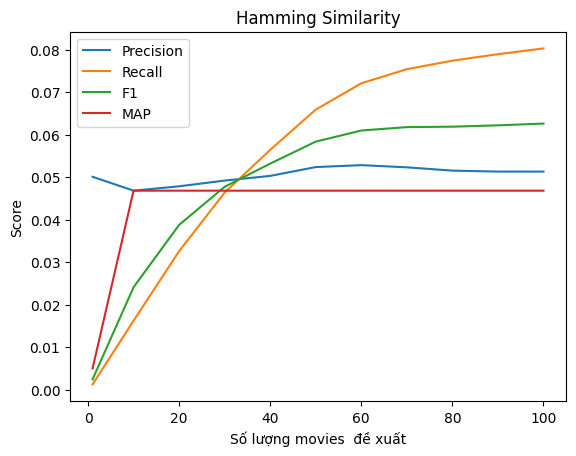

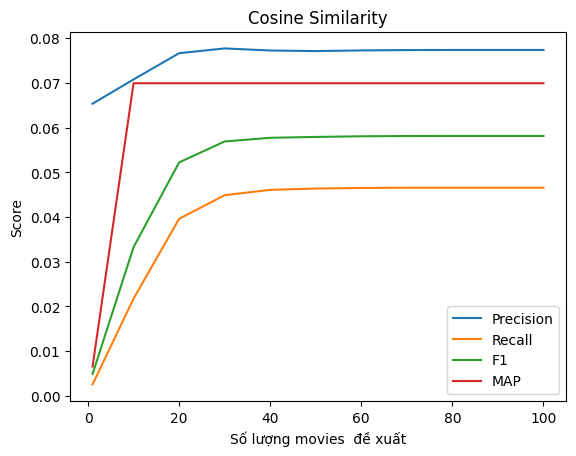

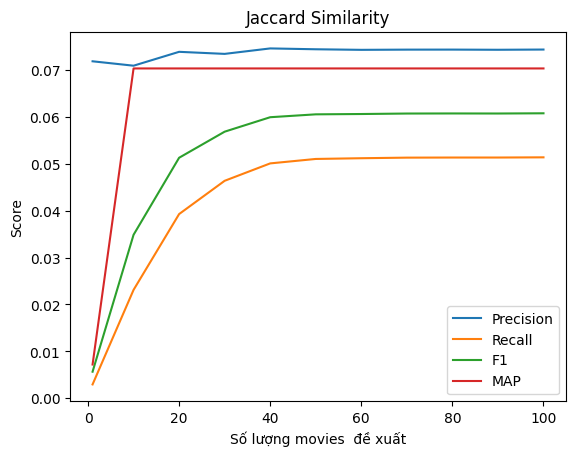

In [108]:
i = 0
for predict in list_similarity:
    precision_values_list, recall_values_list, f1_values_list, map_score_at_k_list = [], [], [], []
    # num_proposed_movies_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    num_proposed_movies_list = np.arange(1,20)
    for topValues in num_proposed_movies_list:
        userData = {}
        for user in users:
            userData[user] = [predict[user][:topValues], testData[testData["userid"] == user]["movieid"].tolist()]
        
        evaluation_metrics = EvaluationMetrics(userData)
        # Tính toán các độ chính xác
        precision_result = evaluation_metrics.calculate_precision()
        recall_result = evaluation_metrics.calculate_recall()
        f1_score_result = evaluation_metrics.calculate_f1_score()
        map_score_at_k = evaluation_metrics.calculate_map(k=10)

        precision_values_list.append(precision_result)
        recall_values_list.append(recall_result)
        f1_values_list.append(f1_score_result)
        map_score_at_k_list.append(map_score_at_k)
    plt.plot(num_proposed_movies_list, precision_values_list, label='Precision')
    plt.plot(num_proposed_movies_list, recall_values_list, label='Recall')
    plt.plot(num_proposed_movies_list, f1_values_list, label='F1')
    plt.plot(num_proposed_movies_list, map_score_at_k_list, label='MAP')
    plt.xlabel('Số lượng movies  đề xuất')
    plt.ylabel('Score')
    if predict == hamming_predict:
        plt.title('Hamming Similarity')
    if predict == cosine_predict:
        plt.title('Cosine Similarity')
    if predict == jaccard_predict:
        plt.title('Jaccard Similarity')
    plt.legend()
    plt.savefig(f"{i}.svg")
    plt.show()
    i = i + 1